# Source height

Figure 10 of the Kang et al. (2020) is generated using this notebook. 
To run the simulation, you need to run `source_height.py` in `python_scripts` folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
os.chdir("./source_heights/")
datas = []
for file in np.sort(glob.glob("data*")):
    datas.append(np.load(file))
x = np.load("xyz.npy")

In [2]:
pico = 1e-12
area = 536.36
moment = pico * area

In [3]:
moment

5.3636e-10

In [4]:
source_heights = [20, 40, 60, 80]

In [5]:
from simpegEM1D import diffusion_distance

In [6]:
diffusion_distance(0.01, 0.001)

3989.4228040143266

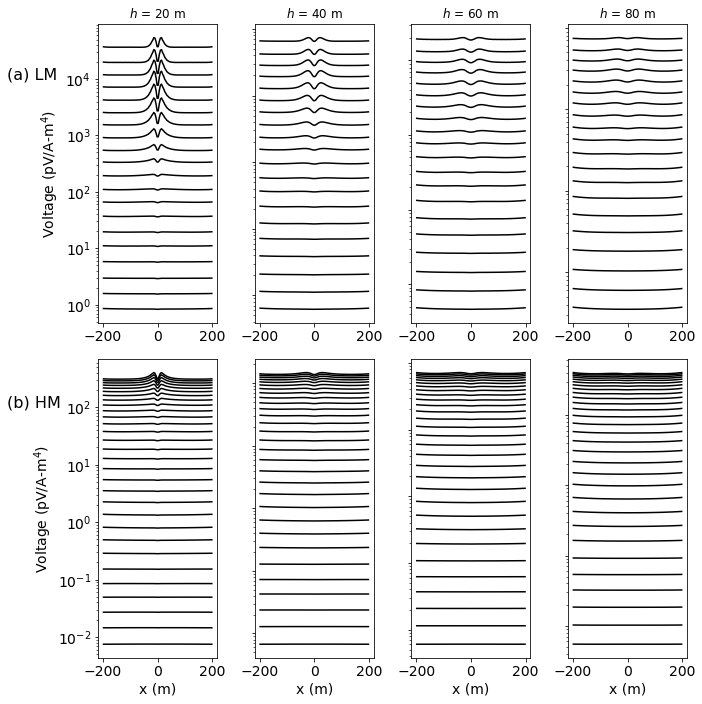

In [7]:
import matplotlib
matplotlib.rcParams['font.size'] = 14

cs_labels = [
    ('$h$ = %i m') % (source_height) for source_height in source_heights
]
fig, axs = plt.subplots(2, 4, figsize=(10, 10))


for ii, jj in enumerate(range(4)):
    data = datas[jj].copy()
    data_hm = data[:100*30].reshape((30, 100), order='F').T
    data_lm = data[100*30:].reshape((20, 100), order='F').T  
    out = axs[0,ii].semilogy(x[:,0], -data_lm/moment, 'k-', ms=3)            
    out = axs[1,ii].semilogy(x[:,0], -data_hm/moment, 'k-', ms=3)      
    
    if ii > 0:
        axs[0,ii].set_yticklabels([])
        axs[1,ii].set_yticklabels([])        
    else:
        axs[0,ii].text(-550, 1e4, "(a) LM", fontsize=16)
        axs[1,ii].text(-550, 1e2, "(b) HM", fontsize=16)        
    axs[0,ii].set_title(cs_labels[jj], fontsize=12)
    axs[1,ii].set_xlabel("x (m)")

axs[0, 0].set_ylabel("Voltage (pV/A-m$^4$)")
axs[1, 0].set_ylabel("Voltage (pV/A-m$^4$)")
plt.tight_layout()
fig.savefig('../figures/figure-10', dpi=200)